<a href="https://colab.research.google.com/github/DeepsMaxi305/Data_Science/blob/main/M507B_Madhavi_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.cluster import KMeans
import tensorflow as tf

#Load the Dataset

In [225]:
data = pd.read_csv("/content/stroke_dataset.csv")
data = data.set_index("id")
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#Checking for Missing Values

In [226]:
missing_values_count = data.isnull().sum()
print(missing_values_count)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


#Drop Missing Values

In [227]:
data.dropna(inplace=True)

#Calculating Percentage of Male and Female Patients

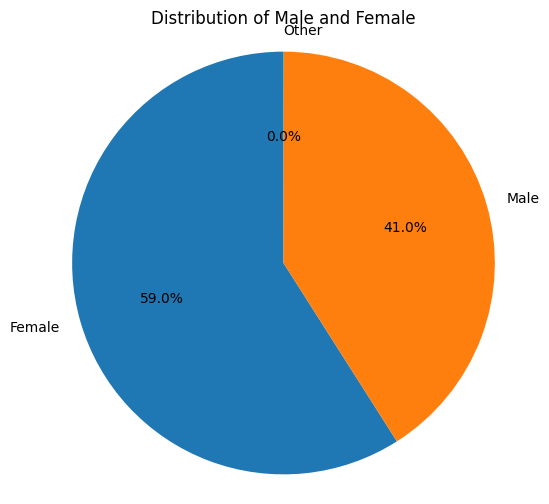

In [228]:
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Distribution of Male and Female')
plt.show()


#Age Distribution for Stroke and Non-Stroke Cases

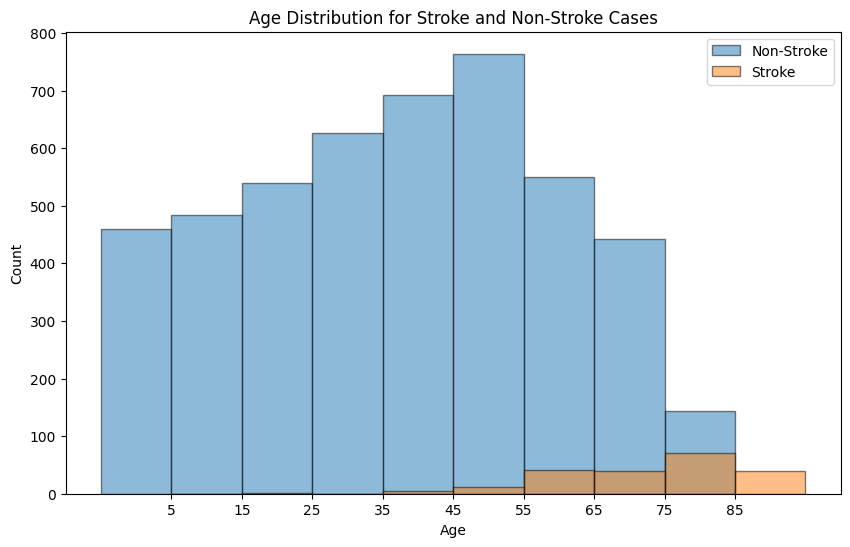

In [229]:
bins = np.arange(0, max(data['age'])+10, 10)
plt.figure(figsize=(10, 6))
plt.hist(data[data['stroke'] == 0]['age'], bins=bins, alpha=0.5, align='left', label='Non-Stroke', edgecolor='black')
plt.hist(data[data['stroke'] == 1]['age'], bins=bins, alpha=0.5, align='right', label='Stroke', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution for Stroke and Non-Stroke Cases')
plt.legend()
plt.xticks(bins[:-1] + 5)
plt.show()

#BMI Distribution for Stroke and Non-Stroke Cases

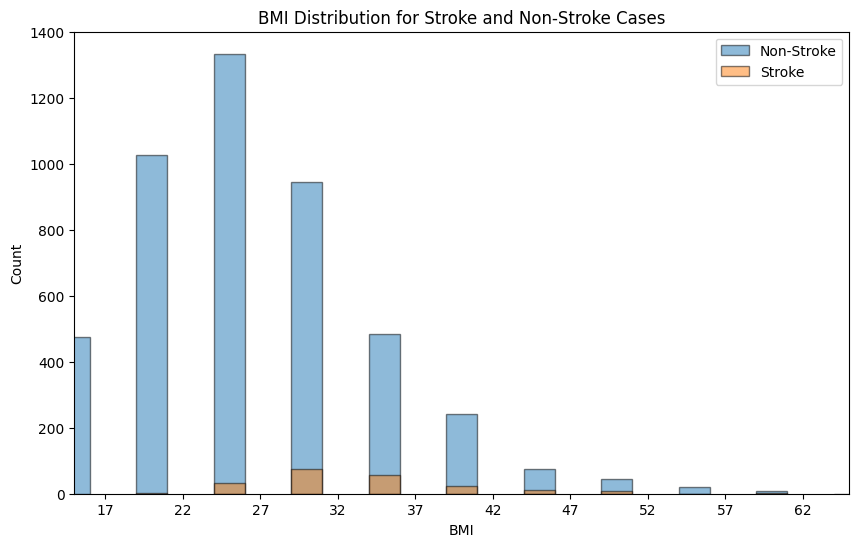

In [230]:
plt.figure(figsize=(10, 6))
plt.hist(data[data['stroke'] == 0]['bmi'], bins=range(15, 66, 5), alpha=0.5, align='left', label='Non-Stroke', edgecolor='black', rwidth=0.4)
plt.hist(data[data['stroke'] == 1]['bmi'], bins=range(15, 66, 5), alpha=0.5, align='right', label='Stroke', edgecolor='black', rwidth=0.4)
plt.xlabel('BMI')
plt.ylabel('Count')
plt.title('BMI Distribution for Stroke and Non-Stroke Cases')
plt.legend()
plt.xticks(range(17, 66, 5))
plt.xlim(15, 65)
plt.show()

#Average Glucose Level for Stroke and Non-Stroke Cases

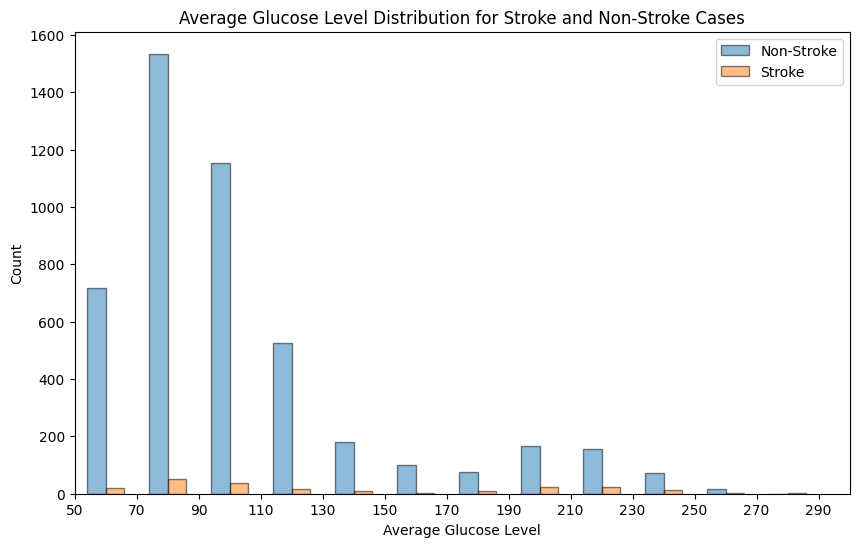

In [231]:
plt.figure(figsize=(10, 6))
plt.hist([data[data['stroke'] == 0]['avg_glucose_level'], data[data['stroke'] == 1]['avg_glucose_level']], bins=range(50, 301, 20), alpha=0.5, label=['Non-Stroke', 'Stroke'], edgecolor='black', rwidth=0.6)
plt.xlabel('Average Glucose Level')
plt.ylabel('Count')
plt.title('Average Glucose Level Distribution for Stroke and Non-Stroke Cases')
plt.legend()
plt.xticks(range(50, 301, 20))
plt.xlim(50, 300)
plt.show()

#Distribution of Stroke Cases by Smoking Status

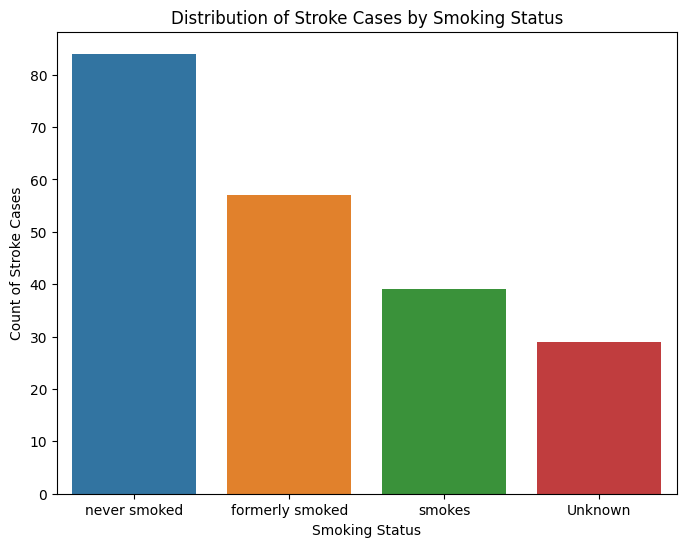

In [232]:
smoking_stroke_counts = data[data['stroke'] == 1]['smoking_status'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=smoking_stroke_counts.index, y=smoking_stroke_counts.values)
plt.xlabel('Smoking Status')
plt.ylabel('Count of Stroke Cases')
plt.title('Distribution of Stroke Cases by Smoking Status')
plt.show()

#One Hot Encoding

In [233]:
data_encoded = pd.get_dummies(data, columns=
 ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'], drop_first=True)

#Standardization

In [234]:
scaler = StandardScaler()
data_encoded[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data_encoded[['age', 'avg_glucose_level', 'bmi']])

#Splitting Dataset into Train and Test sets

In [235]:
X = data_encoded.drop('stroke', axis=1)
y = data_encoded['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Random Forest Classifier

In [236]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

#Calculating Accuracy of Random Forest Model

In [237]:
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.945010183299389


#Gradient Boosting Classifier

In [238]:
gb_model = HistGradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_y_pred = gb_model.predict(X_test)

#Calculating Accuracy of Gradient Booster Model

In [239]:
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print("Gradient Boosting Accuracy:", gb_accuracy)

Gradient Boosting Accuracy: 0.9429735234215886


#Cross-Validation

In [240]:
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
gb_cv_scores = cross_val_score(gb_model, X, y, cv=5)
print("Random Forest Cross-Validation Scores:")
print(rf_cv_scores)
print("Mean Random Forest CV Score:", rf_cv_scores.mean())
print("Gradient Boosting Cross-Validation Scores:")
print(gb_cv_scores)
print("Mean Gradient Boosting CV Score:", gb_cv_scores.mean())

Random Forest Cross-Validation Scores:
[0.95723014 0.95519348 0.95621181 0.95621181 0.95820591]
Mean Random Forest CV Score: 0.9566106325687036
Gradient Boosting Cross-Validation Scores:
[0.95315682 0.95315682 0.95010183 0.95417515 0.9490316 ]
Mean Gradient Boosting CV Score: 0.9519244463544618


#Tensorflow Neural Network

In [241]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
tf_y_pred = model.predict(X_test)
tf_y_pred = tf_y_pred.round().astype(int).reshape(-1)

Epoch 1/10
123/123 [==============================] - 1s 4ms/step - loss: 0.2189 - accuracy: 0.9526 - val_loss: 0.1806 - val_accuracy: 0.9460
Epoch 2/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1424 - accuracy: 0.9603 - val_loss: 0.1718 - val_accuracy: 0.9460
Epoch 3/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1377 - accuracy: 0.9603 - val_loss: 0.1729 - val_accuracy: 0.9460
Epoch 4/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1344 - accuracy: 0.9603 - val_loss: 0.1690 - val_accuracy: 0.9460
Epoch 5/10
123/123 [==============================] - 0s 3ms/step - loss: 0.1324 - accuracy: 0.9603 - val_loss: 0.1722 - val_accuracy: 0.9460
Epoch 6/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1301 - accuracy: 0.9605 - val_loss: 0.1708 - val_accuracy: 0.9460
Epoch 7/10
123/123 [==============================] - 0s 2ms/step - loss: 0.1289 - accuracy: 0.9605 - val_loss: 0.1719 - val_accuracy: 0.9460
Epoch 

#Calculating Accuracy of Tensor Flow Neural Network Model

In [242]:
tf_accuracy = accuracy_score(y_test, tf_y_pred)
print("TensorFlow Accuracy:", tf_accuracy)

TensorFlow Accuracy: 0.9460285132382892
